In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN


In [2]:
dane = pd.read_csv('summer-travel-gps-full.csv')

In [6]:
dane[:3]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom


In [9]:
dane.city.unique()

array(['West Drayton', 'Hounslow', 'Lisbon', 'Amadora',
       'Algueirão-Mem Martins', 'Sintra', 'Damaia', 'Azambuja',
       'Santarém', 'Zibreira', 'Ourém Municipality', 'São Mamede',
       'Leiria District', 'Coimbra Municipality', 'Aveiro District',
       'Vila Nova de Gaia', 'Porto', 'Vila Nova de Gaia Municipality',
       'Porto District', 'Maia Municipality', 'Matosinhos', 'Maia',
       'El Prat de Llobregat', 'Viladecans', 'Barcelona', 'Zendek',
       'Tarnowskie Góry County', 'Silesian Voivodeship',
       'Dabrowa Gornicza', 'Olkusz County', 'Krakow',
       'Kraków-Śródmieście', 'Oswiecim', 'Babice, Oświęcim County',
       'Wygiełzów, Lesser Poland Voivodeship', 'Chrzanów County',
       'Wieliczka', 'Balice, Lesser Poland Voivodeship', 'Trzebinia',
       'Imielin', 'Ruda Slaska', 'Gliwice', 'Bytom', 'Novy Bohumin',
       'Ostrava', 'Suchdol nad Odrou', 'Hranice', 'Prerov',
       'Ústí nad Orlicí', 'Kojice', 'Sadská', 'Prague', 'Úvaly',
       'Poříčany', 'Kolin', 

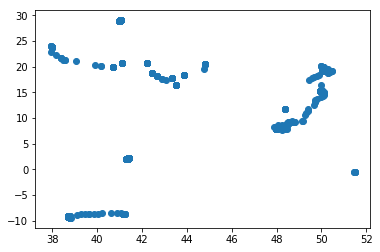

In [8]:
plt.scatter(dane.lat, dane.lon)
plt.show()

In [52]:
dane = pd.read_csv('summer-travel-gps-full.csv')
points = dane[['lon','lat']]
points[:3]

,lon,lat
0,-0.451011,51.481292
1,-0.450999,51.474005
2,-0.446081,51.478199


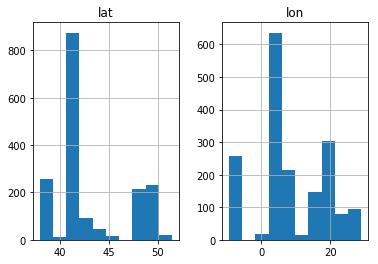

In [53]:
dane.hist(column=['lon','lat'])
plt.show()

In [54]:
points.describe()

,lon,lat
count,1759.000000,1759.000000
mean,7.867407,43.142744
std,10.821489,3.897152
min,-9.425103,37.921659
25%,2.150215,41.143072
50%,2.183084,41.385976
75%,18.425965,47.989978
max,29.011215,51.481292


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
points_sc = scaler.fit_transform(points)
dane_sc = pd.DataFrame(points_sc, columns=['lot', 'lat'])

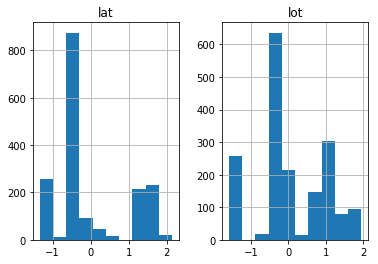

In [60]:
dane_sc.hist()
plt.show()

In [61]:
dane_sc.describe()

,lot,lat
count,1.759000e+03,1.759000e+03
mean,5.601293e-16,-7.644697e-16
std,1.000284e+00,1.000284e+00
min,-1.598433e+00,-1.340099e+00
25%,-5.284687e-01,-5.132570e-01
50%,-5.254304e-01,-4.509108e-01
75%,9.759803e-01,1.244142e+00
max,1.954428e+00,2.140260e+00


In [62]:
len(points_sc)

1759

In [89]:
my_points = 1000*points_sc

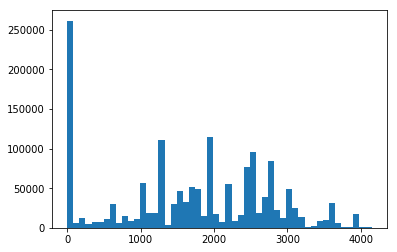

In [90]:
x = euclidean_distances(my_points)
plt.hist(x[np.tril_indices(x.shape[0])], bins=50)#,cumulative=True
plt.show()

In [91]:
k=6
y = np.sort(x,axis=1)[:,1:]
np.round(y[:1000:100,:k],1)

array([[ 0.9,  0.9,  1. ,  1. ,  1.8,  1.9],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2,  0.3,  0.4,  0.4],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.1,  0.2,  0.3,  0.3,  0.3,  0.3],
       [ 0.3,  0.4,  0.4,  0.4,  0.5,  0.6],
       [ 0.1,  0.1,  0.2,  0.3,  0.7,  0.8],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, 11. , 23.1, 23.7, 24.2, 24.2],
       [ 0. ,  3.5,  8.4,  9.3,  9.3,  9.6]])

In [194]:
clustering = DBSCAN(eps=200, min_samples=30).fit(my_points)
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [195]:
y = pd.Series(clustering.labels_)

In [196]:
y.unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [174]:
len(dane.city.unique())

113

In [175]:
colors = np.array(sns.color_palette("Set2",30))

In [197]:
np.unique(y, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([ 29, 181,  75, 646, 236, 217, 137,  64,  80,  94]))

In [198]:
for label in y.unique():
    print(dane[y == label].city.unique())

['West Drayton' 'Hounslow' 'Belgrade' 'Slepčević' 'Dytiki Ellada' 'Munich']
['Lisbon' 'Amadora' 'Algueirão-Mem Martins' 'Sintra' 'Damaia' 'Azambuja'
 'Santarém' 'Zibreira' 'Ourém Municipality' 'São Mamede' 'Leiria District'
 'Coimbra Municipality']
['Aveiro District' 'Vila Nova de Gaia' 'Porto'
 'Vila Nova de Gaia Municipality' 'Porto District' 'Maia Municipality'
 'Matosinhos' 'Maia']
['El Prat de Llobregat' 'Viladecans' 'Barcelona' 'Hospitalet de Llobregat']
['Zendek' 'Tarnowskie Góry County' 'Silesian Voivodeship'
 'Dabrowa Gornicza' 'Olkusz County' 'Krakow' 'Kraków-Śródmieście'
 'Oswiecim' 'Babice, Oświęcim County'
 'Wygiełzów, Lesser Poland Voivodeship' 'Chrzanów County' 'Wieliczka'
 'Balice, Lesser Poland Voivodeship' 'Trzebinia' 'Imielin' 'Ruda Slaska'
 'Gliwice' 'Bytom' 'Novy Bohumin' 'Ostrava' 'Suchdol nad Odrou' 'Hranice'
 'Prerov' 'Ústí nad Orlicí' 'Kojice' 'Sadská' 'Prague' 'Úvaly' 'Poříčany'
 'Kolin' 'Kutna Hora' 'Nové Dvory (Kutná Hora District)' 'Český Brod'
 'Beroun' 'M

In [206]:
alpha = [0.25]+[1]*(len(y)-1)

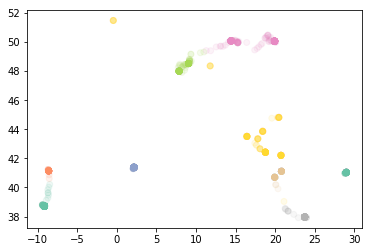

In [210]:
plt.scatter(dane.lon, dane.lat, c = colors[y], alpha = 0.1)
plt.show()

In [179]:
colors[-1]

array([1.        , 0.85098039, 0.18431373])